## 简答题
1. 支持向量机基本思想是什么？

支持向量机（SVM）背后的基本思想是在类之间构建尽可能宽的“街道”。换句话说，目标是使区分两个类的决策边界与训练实例之间的边距尽可能大。在进行软边距分类时，SVM 会在完美区分两个类和尽可能宽的“街道”（即，少数实例最终可能会出现在“街道”上）之间寻找一个折衷方案。另一个关键思想是在非线性数据集上训练时使用核函数。SVM 也可以进行调整，以执行线性和非线性回归。

2. 什么是支持向量？

训练完 SVM 后，支持向量就是位于“街道”上的任何实例，包括其边界。决策边界完全由支持向量决定。任何非支持向量（即不在街道上）的实例都不会对决策边界产生任何影响；可以移除它们、添加更多实例或删除它们，只要它们不在街道上，就不会影响决策边界。使用核化 SVM 计算预测仅涉及支持向量，而不是整个训练集。

3. 在使用SVM时，缩放输入值为什么很重要？

SVM 尝试在类之间找到尽可能大的“街道”（参见第一个答案），因此如果训练集没有缩放，SVM 就会倾向于忽略小的特征（最宽的街道接近水平，小的特征看起来不影响）

4. SVM分类器在对实例进行分类时能输出置信度分数吗？概率呢？

可以使用decision_function获取置信度分数，这些分数表示实例与决策边界之间的距离。但是它们不能直接转换为类概率的估计值。如果在创建SVC时设置了probability=True，那么在训练结束时，使用5折交叉验证为训练样本生成作为验证集的分数（训练一个逻辑回归模型，把这些分数映射到估计的概率），之后predict_proba()和predict_log_proba()方法将可用。

5. 你如何在LinearSVC，SVC和SGDClassifier之间进行选择

它们三个都可用于大边距线性分类。SVC类还支持核技巧，这使得它能够处理非线性任务。但是SVC类无法很好地扩展到包含大量实例的数据集，不过能够很好地扩展到大量特征（O(m^2 * n)--O(m^3 * n))。LinearSVC类实现了针对线性SVM的优化算法，而SGDClassifier则使用随机梯度下降法。LinearSVC和SGDClassifier速度差不多（O(m*n))，但SGDClassifier更灵活，支持增量学习

6. 假设已经使用RBF核训练了一个SVM分类器，但它似乎欠拟合训练集，应该增大还是减小gamma? C呢？

应该增大gamma：gamma越大，远离锚定值衰减的越厉害，每个实例的影响范围随之变小：决策边界变得更不规则，开始单个实例绕弯 -> 降低欠拟合。
应该增大C：C增大，会惩罚更宽的边距（边距宽引入更多边距内的分类错误，C越大，对这个错误惩罚越强）。 把边距收紧就是在降低欠拟合。

7. epsilon不敏感模型是什么意思？

回归SVM模型会尝试在预测模型的边界范围内（epsilon）拟合尽可能多的实例，训练后，在这个范围内添加实例，模型参数将完全不受影响，这个被叫做epsilon不敏感 -> 回归SVM模型的支持向量是边界范围外的实例。

8. 使用核技巧有什么意义？

核技巧是一种数学技巧，可以训练非线性SVM模型。生成的模型相当于使用非线性变换将输入映射到另一个空间，然后在得到的高维度输入上训练线性SVM. 核技巧无需对输入进行任何变换即可获得相同的结果

## SVM分类葡萄酒

In [3]:
# SVM分类葡萄酒
import pandas as pd
from sklearn.datasets import load_wine
wine = load_wine(as_frame=True)

In [11]:
wine.data.describe()  # 看数据
wine.data.info()
pd.Series(wine.target).value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

target
1    71
0    59
2    48
Name: count, dtype: int64

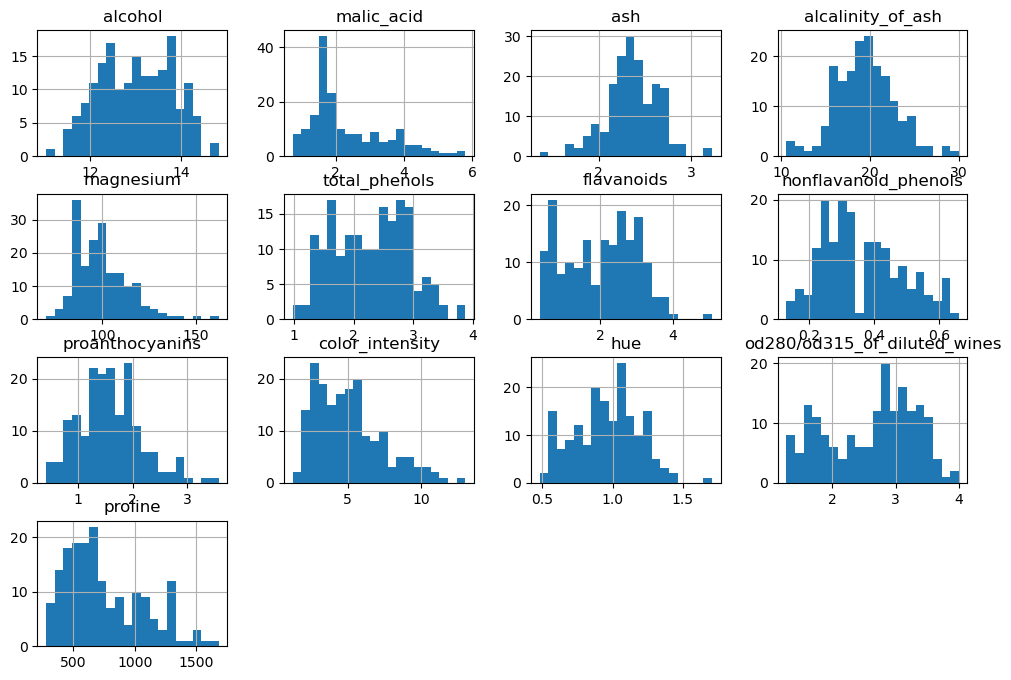

In [9]:
import matplotlib.pyplot as plt
wine.data.hist(bins=20, figsize=(12, 8))
plt.show()

In [10]:
# (178,13), (178,)
import numpy as np
X, y = wine.data.values, wine.target

# 打乱数据集
rnd_indices = np.random.permutation(X.shape[0])
X, y = X[rnd_indices], y[rnd_indices]

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.multiclass import OneVsRestClassifier  # 一对其余的分类器
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
svc_clf = make_pipeline(StandardScaler(), OneVsRestClassifier(SVC(random_state=42)))

In [13]:
svc_clf.steps  # 查看流水线的命名

[('standardscaler', StandardScaler()),
 ('onevsrestclassifier', OneVsRestClassifier(estimator=SVC(random_state=42)))]

In [14]:
svc_clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('onevsrestclassifier',
                 OneVsRestClassifier(estimator=SVC(random_state=42)))])

In [15]:
svc_clf.decision_function(X).round(2)  # 查看决策分数

array([[-1.  ,  1.  , -1.33],
       [ 1.44, -1.42, -1.18],
       [ 0.82, -0.96, -1.11],
       [-1.  , -1.05,  1.  ],
       [-1.46,  1.52, -1.33],
       [-1.22, -1.04,  1.08],
       [ 1.29, -1.27, -1.2 ],
       [-1.02, -1.15,  1.  ],
       [-1.16, -1.4 ,  1.39],
       [-1.15, -1.18,  1.11],
       [-1.02,  1.25, -1.44],
       [-1.19, -1.44,  1.49],
       [-1.  ,  1.  , -1.35],
       [ 1.59, -1.65, -1.  ],
       [-1.62,  1.9 , -1.65],
       [ 0.51, -0.47, -1.  ],
       [-1.13, -1.48,  1.37],
       [-1.03, -1.19,  1.05],
       [-1.  ,  1.  , -1.06],
       [-1.  ,  1.  , -1.  ],
       [-1.07, -1.14,  1.07],
       [ 1.71, -1.78, -1.19],
       [-1.31,  1.02, -1.  ],
       [-1.27,  1.64, -1.67],
       [ 1.  , -0.89, -1.42],
       [-1.12, -1.  ,  1.  ],
       [-1.24, -0.94,  0.91],
       [ 1.54, -1.59, -1.15],
       [-1.1 , -1.43,  1.32],
       [ 1.76, -1.72, -1.25],
       [-1.  , -1.58,  1.4 ],
       [-1.05, -1.49,  1.31],
       [ 0.89, -1.  , -1.  ],
       [-1

In [16]:
from sklearn.metrics import accuracy_score
y_pred = svc_clf.predict(X)
accuracy_score(y, y_pred)

1.0

In [19]:
from sklearn.model_selection import cross_val_score
cross_val_score(svc_clf, X, y, cv=5, scoring='accuracy')

svc_clf.steps
np.logspace(-2, 2, 5) # 10**(-2), 10**1,10**0,10**1,10**2

array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])

In [20]:
from sklearn.model_selection import GridSearchCV

# 1*6* 5 + 1*5*6*3 = 30 + 90 = 120
# 120 * 5= 600

param_grid = [
    {"onevsrestclassifier__estimator__kernel": ["rbf"],
     "onevsrestclassifier__estimator__gamma": ["scale", "auto", 1, 5, 25, 100],
     "onevsrestclassifier__estimator__C": np.logspace(-2, 2, 5),
     },

    {"onevsrestclassifier__estimator__kernel": ["sigmoid"],
     "onevsrestclassifier__estimator__C": np.logspace(-2, 2, 5),
     "onevsrestclassifier__estimator__gamma": ["scale", "auto", 1, 5, 25, 100],
     "onevsrestclassifier__estimator__coef0": [0,1,2]
    }
]

grid_search  = GridSearchCV(svc_clf, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X, y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('onevsrestclassifier',
                                        OneVsRestClassifier(estimator=SVC(random_state=42)))]),
             param_grid=[{'onevsrestclassifier__estimator__C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                          'onevsrestclassifier__estimator__gamma': ['scale',
                                                                    'auto', 1,
                                                                    5, 25,
                                                                    100],
                          'onevsrestclassifier__estimator__kernel': ['rbf']},
                         {'onevsrestclassifier__estimator__C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                          'onevsrestclassifier__estimator__coef0': [0, 1, 2],
                          'onevsrestclassifier__estimator__gamma': ['scale',
                                                                    'auto', 1,
                                                                    5, 25,
                                                                    100],
                          'onevsrestclassifier__estimator__kernel': ['sigmoid']}],
             scoring='accuracy')

In [21]:
pd.DataFrame(grid_search.cv_results_).sort_values(by="mean_test_score", ascending=False)   # 大概看一下排名，以及排名最高的模型参数

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_onevsrestclassifier__estimator__C,param_onevsrestclassifier__estimator__gamma,param_onevsrestclassifier__estimator__kernel,param_onevsrestclassifier__estimator__coef0,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.010178,0.001221,0.003228,0.000221,0.01,scale,rbf,NaN,"{'onevsrestclassifier__estimator__C': 0.01, 'o...",0.972222,1.000000,0.944444,1.0,1.0,0.983333,0.022222,1
1,0.009867,0.000497,0.003313,0.000372,0.01,auto,rbf,NaN,"{'onevsrestclassifier__estimator__C': 0.01, 'o...",0.972222,1.000000,0.944444,1.0,1.0,0.983333,0.022222,1
6,0.008950,0.001255,0.003143,0.000664,0.1,scale,rbf,NaN,"{'onevsrestclassifier__estimator__C': 0.1, 'on...",0.972222,1.000000,0.944444,1.0,1.0,0.983333,0.022222,1
7,0.009656,0.000375,0.002905,0.000644,0.1,auto,rbf,NaN,"{'onevsrestclassifier__estimator__C': 0.1, 'on...",0.972222,1.000000,0.944444,1.0,1.0,0.983333,0.022222,1
66,0.006543,0.001238,0.002225,0.000194,1.0,scale,sigmoid,0,"{'onevsrestclassifier__estimator__C': 1.0, 'on...",0.972222,1.000000,0.944444,1.0,1.0,0.983333,0.022222,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,0.011826,0.001106,0.003508,0.000308,0.01,5,rbf,NaN,"{'onevsrestclassifier__estimator__C': 0.01, 'o...",0.416667,0.388889,0.388889,0.4,0.4,0.398889,0.010184,106
28,0.012810,0.000686,0.003697,0.000395,100.0,25,rbf,NaN,"{'onevsrestclassifier__estimator__C': 100.0, '...",0.416667,0.388889,0.388889,0.4,0.4,0.398889,0.010184,106
5,0.012969,0.000601,0.004422,0.000384,0.01,100,rbf,NaN,"{'onevsrestclassifier__estimator__C': 0.01, 'o...",0.416667,0.388889,0.388889,0.4,0.4,0.398889,0.010184,106
4,0.015155,0.004765,0.004499,0.000454,0.01,25,rbf,NaN,"{'onevsrestclassifier__estimator__C': 0.01, 'o...",0.416667,0.388889,0.388889,0.4,0.4,0.398889,0.010184,106


In [23]:
grid_search.best_params_
best_svc = grid_search.best_estimator_

In [24]:
accuracy_score(y, best_svc.predict(X))

0.9943820224719101

## SVM 回归

在加州房屋数据集上训练和微调SVM回归器。可以使用原始数据集而不是 在课上使用的调整后的版本，

可以使用sklearn.datasets.fetch_california_housing()加载它。目标代表了数十万美元。

由于有超过20000个实例，SVM可能会很慢，因此对于超参数调整，应该使用更少的实例（例如2000个）来测试更多的超参数组合。最佳模型的RMSE是多少？

In [1]:
import pandas as pd
housing = pd.read_csv("data/california_housing_train.csv")
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [26]:
# 把之前的预处理搬过来， 做点调整
import numpy as np
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.cluster import KMeans

def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

def ratio_name(function_transformer, feature_names_in):
    return ["ratio"]  # feature names out （输出特征的名字）

def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(column_ratio, feature_names_out=ratio_name),
        StandardScaler())

log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log, feature_names_out="one-to-one"),  # one-to-one: 1比1映射
    StandardScaler())


class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state

    def fit(self, X, y=None, sample_weight=None):
        # KMeans估计器相关参数：集群数量，随机种子，KMeans是一个随机算法，依赖随机性来定位集群
        self.kmeans_ = KMeans(self.n_clusters, n_init=10,
                              random_state=self.random_state)

        # sample_weight可指定样本的相对权重, 属于KMeans算法里的超参数，训练前指定。
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self # 永远返回self

    def transform(self, X):
        # self.kmeans_.cluster_centers_ 集群中心的位置
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)

    def get_feature_names_out(self, names=None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]

cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)

default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                                     StandardScaler())


preprocessing = ColumnTransformer([
        ("bedrooms", ratio_pipeline(), ["total_bedrooms", "total_rooms"]),
        ("rooms_per_house", ratio_pipeline(), ["total_rooms", "households"]),
        ("people_per_house", ratio_pipeline(), ["population", "households"]),
        ("log", log_pipeline, ["total_bedrooms", "total_rooms", "population",
                               "households", "median_income"]),
        ("geo", default_num_pipeline, ["latitude", "longitude"]),  # 直接用地理位置特征，不再预处理
    ], remainder=default_num_pipeline)


In [27]:
from sklearn.model_selection import train_test_split

housing_features, housing_labels = housing.iloc[:, :-1], housing.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(housing_features, housing_labels, random_state=42, test_size=0.2, shuffle=True,
                 stratify=pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5]))

In [28]:
# 验证分层采样的结果
pd.cut(X_train["median_income"],bins=[0., 1.5, 3.0, 4.5, 6., np.inf], labels=[1, 2, 3, 4, 5]).value_counts() / len(X_train)
pd.cut(X_test["median_income"],bins=[0., 1.5, 3.0, 4.5, 6., np.inf], labels=[1, 2, 3, 4, 5]).value_counts() / len(X_test)

median_income
3    0.348235
2    0.318235
4    0.178235
5    0.116176
1    0.039118
Name: count, dtype: float64

In [29]:
from sklearn.svm import SVR

svr_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("svr", SVR())
])

In [2]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, randint

rnd_search = RandomizedSearchCV(svr_pipeline, param_distributions={
    "svr__kernel": ["rbf", "linear"],
    "svr__gamma": expon(scale=1),
    "svr__C": np.logspace(-2, 5, 50),
    "svr__epsilon": np.logspace(-1, 1, 50)
}, n_iter=80, scoring="neg_mean_squared_error", cv=3)

rnd_search.fit(X_train[:2000], y_train[:2000])

NameError: name 'svr_pipeline' is not defined

In [31]:
rnd_search.best_params_

{'svr__C': 71968.56730011514,
 'svr__epsilon': 1.6768329368110073,
 'svr__gamma': 0.14427220332205629,
 'svr__kernel': 'rbf'}

In [32]:
pd.DataFrame(rnd_search.cv_results_).sort_values(by="mean_test_score", ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_svr__C,param_svr__epsilon,param_svr__gamma,param_svr__kernel,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
58,0.198101,0.007030,0.131751,0.015605,71968.5673,1.676833,0.144272,rbf,"{'svr__C': 71968.56730011514, 'svr__epsilon': ...",-3.596549e+09,-3.291380e+09,-4.517289e+09,-3.801739e+09,5.210827e+08,1
3,0.188596,0.000502,0.141382,0.000485,51794.746792,1.264855,0.201308,rbf,"{'svr__C': 51794.74679231202, 'svr__epsilon': ...",-3.786674e+09,-3.547308e+09,-4.691166e+09,-4.008383e+09,4.925912e+08,2
48,0.345405,0.089494,0.062928,0.000344,100000.0,3.237458,0.395809,linear,"{'svr__C': 100000.0, 'svr__epsilon': 3.2374575...",-4.639304e+09,-4.282502e+09,-5.167719e+09,-4.696508e+09,3.636452e+08,3
34,0.297901,0.012977,0.061209,0.002361,71968.5673,0.719686,0.421178,linear,"{'svr__C': 71968.56730011514, 'svr__epsilon': ...",-4.643358e+09,-4.283189e+09,-5.234731e+09,-4.720426e+09,3.922692e+08,4
41,0.183265,0.007523,0.062810,0.000239,19306.977289,0.655129,0.415595,linear,"{'svr__C': 19306.977288832495, 'svr__epsilon':...",-4.767636e+09,-4.389305e+09,-5.358589e+09,-4.838510e+09,3.988694e+08,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,0.167719,0.007402,0.130692,0.007282,0.051795,1.526418,0.556844,rbf,"{'svr__C': 0.0517947467923121, 'svr__epsilon':...",-1.387470e+10,-1.288038e+10,-1.503258e+10,-1.392922e+10,8.794750e+08,76
51,0.189856,0.001772,0.130688,0.007284,0.719686,0.120679,2.957149,rbf,"{'svr__C': 0.7196856730011517, 'svr__epsilon':...",-1.387471e+10,-1.288043e+10,-1.503260e+10,-1.392925e+10,8.794641e+08,77
59,0.167594,0.007454,0.135913,0.007169,0.1,3.237458,1.533353,rbf,"{'svr__C': 0.1, 'svr__epsilon': 3.237457542817...",-1.387475e+10,-1.288036e+10,-1.503264e+10,-1.392925e+10,8.795101e+08,78
22,0.183682,0.005834,0.129467,0.005954,0.019307,4.291934,1.921812,rbf,"{'svr__C': 0.019306977288832496, 'svr__epsilon...",-1.387478e+10,-1.288035e+10,-1.503268e+10,-1.392927e+10,8.795280e+08,79


In [1]:
from sklearn.metrics import mean_squared_error
best_svr = rnd_search.best_estimator_

y_train_pred = best_svr.predict(X_train)
y_test_pred = best_svr.predict(X_test)

mean_squared_error(y_train, y_train_pred, squared=False)
mean_squared_error(y_test, y_test_pred, squared=False)

NameError: name 'rnd_search' is not defined